In [23]:
# Dependency imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import reverse_geocoder as rg

# Configurazione visualizzazioni
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline
# Load dataset
df = pd.read_csv('../data/earthquake_data_tsunami.csv')
df.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


# Numero di tsunami per anno

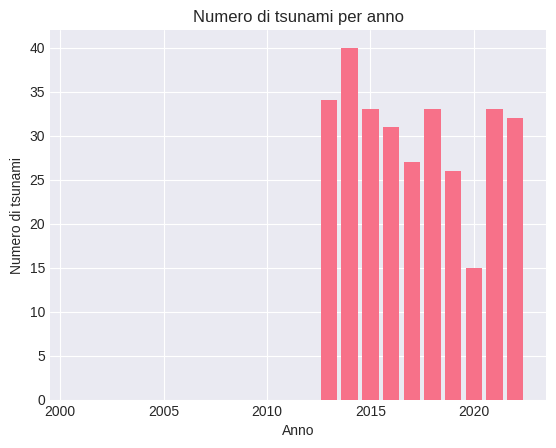

In [14]:
tsunami_year = df.groupby("Year")["tsunami"].sum()
plt.figure()
plt.bar(tsunami_year.index, tsunami_year.values)
plt.title("Numero di tsunami per anno")
plt.xlabel("Anno")
plt.ylabel("Numero di tsunami")
plt.grid(True)
plt.show()

Non ci sono dati sui tsunami prima del 2013.

# Numero di tsunami per mese

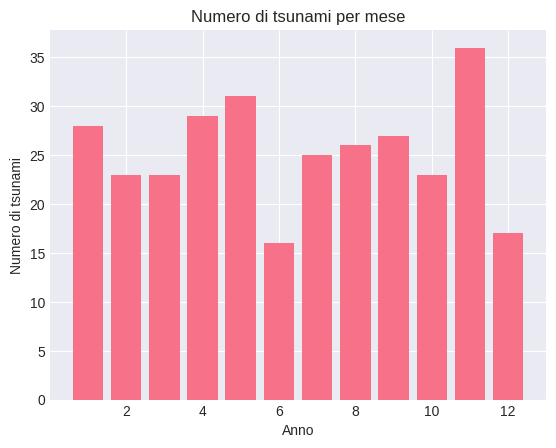

In [13]:
tsunami_month = df.groupby("Month")["tsunami"].sum()
plt.figure()
plt.bar(tsunami_month.index, tsunami_month.values)
plt.title("Numero di tsunami per mese")
plt.xlabel("Anno")
plt.ylabel("Numero di tsunami")
plt.grid(True)
plt.show()

In [ ]:
# this will of course take a while
coords = list(zip(df["latitude"], df["longitude"]))
df["Country"] = [rg.search(c)[0]["cc"] for c in coords]

In [56]:
df[df["Country"] == "JP"].count()
min_year = df["Year"].min()
max_year = df["Year"].max()
print(f"Starts from {min_year} and ends on {max_year}")

Starts from 2001 and ends on 2022


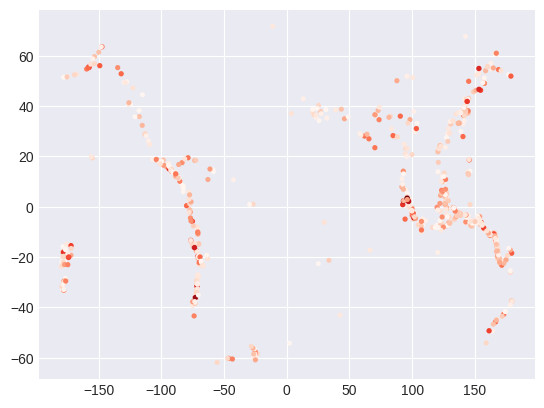

In [90]:
plt.scatter(df["longitude"], df["latitude"], s=df["magnitude"], c=df["magnitude"], cmap="Reds")
plt.show()

In [94]:
df.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami,Region,Country
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1,SB,SB
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0,ID,ID
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1,TO,TO
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1,TO,TO
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1,FJ,FJ


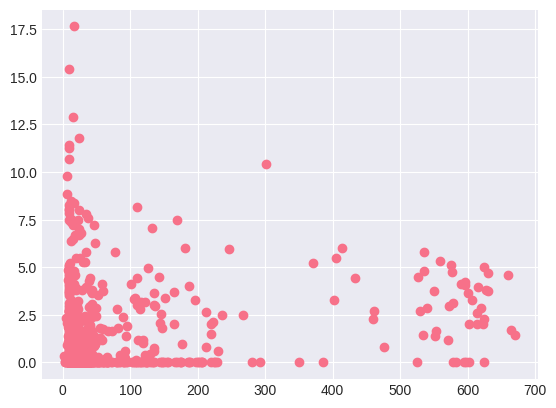

In [104]:
plt.scatter(df["depth"], df["dmin"])